In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Base path for Kaggle input directory
base_path = '/kaggle/input/projet-ter/'  # Update this path if it's different

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()


Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  8% |  2% |


In [4]:
file_names = [
    "articles_24 Heures au BCnin.www.24haubenin.info_.csv",
    "articles_Africa 24.www.youtube.com_channel_UCmEcEP_oCZJ6Mr1uxhUFyRg.csv",
    "articles_Agence de Presse Sngalaise Youtube.www.youtube.com_channel_UC8uoOv4RSzdZKlmPTguYjtg.csv",
    "articles_Agence de Presse Sngalaise.www.aps.sn_.csv",
    "articles_Banouto Media.www.youtube.com_channel_UCwsXkG4LatsF7u_b8dU1p-w.csv",
    "articles_Banouto.www.banouto.bj_.csv",
    "articles_Burkina24 Youtube.www.youtube.com_channel_UCJtaDORHQO20XA-tFwpJysQ.csv",
    "articles_Burkina24.burkina24.com_.csv",
    "articles_Dakaractu TV HD.www.youtube.com_channel_UCG0t6XiAHui-ziz7SwFTN0g.csv",
    "articles_Dakaractu.www.dakaractu.com_.csv",
    "articles_Fraternit.www.fraternitebj.info_.csv",
    "articles_JeuneAfrique Youtube.www.youtube.com_channel_UCWkbzzrku8lwKK6DoBl4yTg.csv",
    "articles_JeuneAfrique.www.jeuneafrique.com_.csv",
    "articles_LObs.www.lobs.sn_.csv",
    "articles_La Nation.lanation.bj_.csv",
    "articles_La Nouvelle Tribune.lanouvelletribune.info_.csv",
    "articles_Le Matinal.groupelematinal.com_category_actualites_.csv",
    "articles_Le Quotidien.lequotidien.sn_.csv",
    "articles_ORTB.www.youtube.com_channel_UCmPXzeJaO7nrA87GIz3N6wQ.csv",
    "articles_RTB - Radiodiffusion Tlvision du Burkina.www.youtube.com_channel_UCZl9utbYlPMssMhgrGUqXZA.csv",
    "articles_SIKKA TELEVISION.www.youtube.com_channel_UCplwKOWLV8s2XZBMsimOjvg.csv",
    "articles_Senegal7.www.youtube.com_channel_UC5eVGjO4ITJA1KM_tva_OSQ.csv",
    "articles_Sud Quotidien TV.www.youtube.com_channel_UCD-YykHgK3BOvnqFlcOFXIA.csv",
    "articles_Sud Quotidien.www.sudquotidien.sn_.csv",
    "articles_TFM (Tl Futurs Medias).www.youtube.com_channel_UC5NQ49FVRIAuWE1el6L2gkg.csv",
    "articles_aCotonou Youtube.www.youtube.com_channel_UCdNz-U4WJwFvbMDMdgYNMrg.csv",
    "articles_aCotonou.news.acotonou.com_.csv",
    "articles_le faso.lefaso.net_.csv",
    "articles_le soleil.lesoleil.sn_.csv",
]

# Initialize an empty list to store dataframes
dfs = []

# Loop through the file names
for file_name in file_names:
    file_path = f"{base_path}{file_name}"
    
    # Read each file into a dataframe
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
        
        # Check if 'source' column exists and does not contain YouTube links
        if 'source' in df.columns and not df['source'].str.contains('youtube.com').any():
            dfs.append(df)

# Concatenate all the dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Verify the combined dataframe
print(f"\nTotal number of records in the combined dataframe: {len(combined_df)}")


Total number of records in the combined dataframe: 23894


In [5]:
combined_df.head()

,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_id,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic
0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Environement (m)
1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Societe (m)
2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),No (m),No (m),No (m),Societe (m)
3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),Yes (m),Yes (m),Yes (m),Economie (m)
4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Sport (m)


In [46]:
# Columns of interest
cols_of_interest = ['CLS_Lexique Sécurité Alimentaire', 'CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']

# Print unique values for each column
for col in cols_of_interest:
    unique_values = combined_df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'CLS_Lexique Sécurité Alimentaire': ['no (m)' 'yes (m)' nan]
Unique values in 'CLS_Relevance': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)' 'Partial (u)']
Unique values in 'CLS_Usefulness': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)']
Unique values in 'CLS_Relevance Yes/No': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)']


In [5]:
# Converting values to lowercase
for col in ['CLS_Lexique Sécurité Alimentaire', 'CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']:
    combined_df[col] = combined_df[col].str.lower()

# Filtering the dataframe
# Define the values we're interested in
allowed_values = ['no (m)', 'yes (m)', 'no (u)', 'yes (u)']

# Create the test dataframe
test_df = combined_df[
    combined_df['CLS_Lexique Sécurité Alimentaire'].isin(allowed_values) &
    combined_df['CLS_Relevance'].isin(allowed_values) &
    combined_df['CLS_Usefulness'].isin(allowed_values) &
    combined_df['CLS_Relevance Yes/No'].isin(allowed_values)
]

# Mapping 'yes (m)', 'yes (u)' to 'yes' and 'no (m)', 'no (u)' to 'no'
mapping = {'yes (m)': 'yes', 'yes (u)': 'yes', 'no (m)': 'no', 'no (u)': 'no'}

for col in ['CLS_Lexique Sécurité Alimentaire', 'CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']:
    test_df[col] = test_df[col].map(mapping)

# Display the first few rows of the test dataframe
test_df.head()

/tmp/ipykernel_43/2723606934.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = test_df[col].map(mapping)
/tmp/ipykernel_43/2723606934.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = test_df[col].map(mapping)
/tmp/ipykernel_43/2723606934.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_id,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic
0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Environement (m)
1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Societe (m)
2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes,no,no,no,Societe (m)
3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes,yes,yes,yes,Economie (m)
4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Sport (m)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


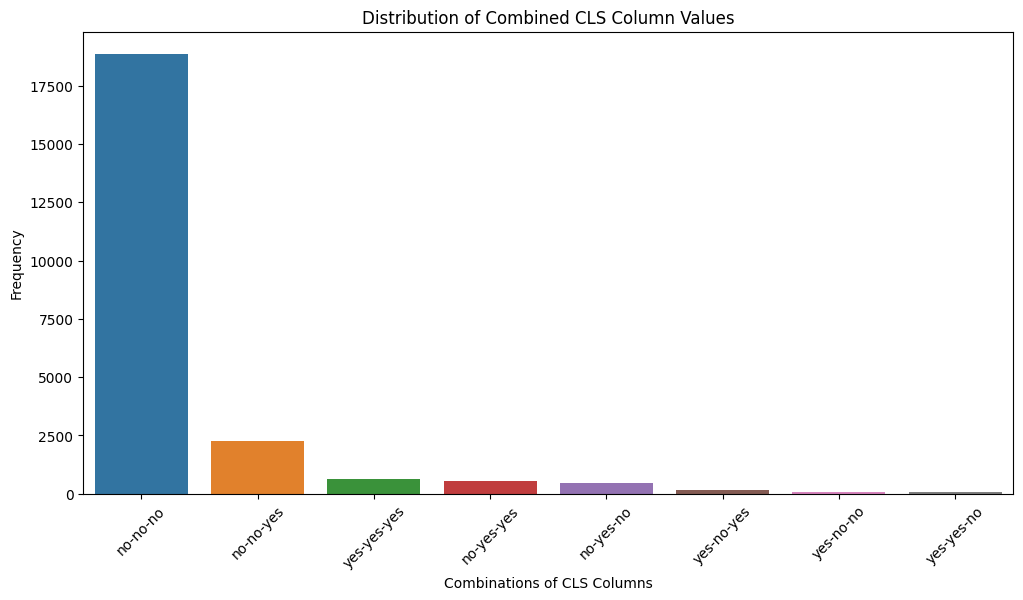

In [48]:
# Create a new DataFrame for visualization
vis_df = test_df.copy()

# Concatenate the values of the three columns into a new column
vis_df['Combined_Cols'] = vis_df[['CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']].agg('-'.join, axis=1)

# Count the frequency of each combination
combination_counts = vis_df['Combined_Cols'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=combination_counts.index, y=combination_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Combinations of CLS Columns')
plt.ylabel('Frequency')
plt.title('Distribution of Combined CLS Column Values')
plt.show()

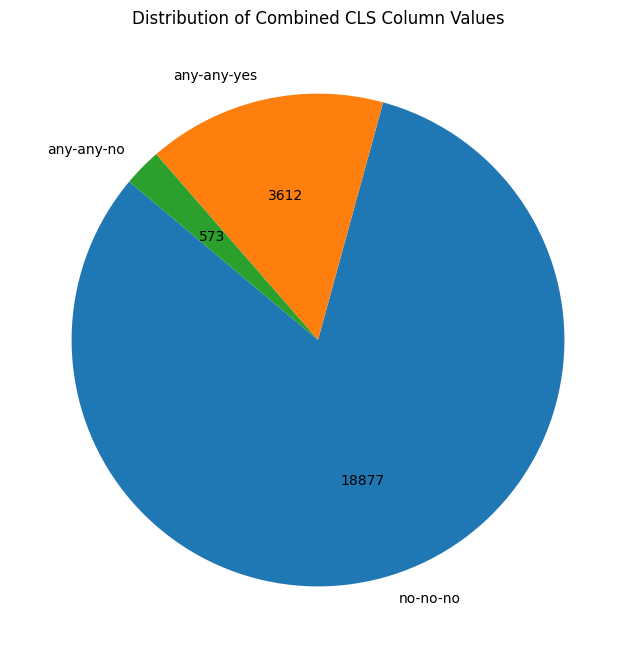

Category
no-no-no       18877
any-any-yes     3612
any-any-no       573
Name: count, dtype: int64


In [49]:
# Function to categorize each row
def categorize_row(row):
    if row == 'no-no-no':
        return 'no-no-no'
    elif row.endswith('no'):
        return 'any-any-no'
    else:
        return 'any-any-yes'

# Apply the categorization function
vis_df['Category'] = vis_df['Combined_Cols'].apply(categorize_row)

# Count the frequency of each category
category_counts = vis_df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(category_counts) / 100), startangle=140)
plt.title('Distribution of Combined CLS Column Values')
plt.show()

# Print the counts for reference
print(category_counts)

In [50]:
# Check the first few rows of the label column
print(test_df['CLS_Relevance Yes/No'].head())

# Check the unique values in the label column
print(test_df['CLS_Relevance Yes/No'].unique())

num_rows = test_df.shape[0]
print(f"Number of rows in test_df: {num_rows}")

0     no
1     no
2     no
3    yes
4     no
Name: CLS_Relevance Yes/No, dtype: object
['no' 'yes']
Number of rows in test_df: 23062


In [6]:
import re
from sklearn.model_selection import train_test_split

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Lowercase the text
    text = text.lower()
    return text

# Apply text cleaning using .loc to avoid SettingWithCopyWarning
test_df.loc[:, 'cleaned_text'] = test_df['text'].apply(clean_text)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(test_df['cleaned_text'], test_df['CLS_Relevance Yes/No'].map({'yes': 1, 'no': 0}), test_size=0.2, random_state=42)

# Display the first few rows of the test dataframe
test_df.head()


/tmp/ipykernel_43/480128841.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'cleaned_text'] = test_df['text'].apply(clean_text)


,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic,cleaned_text
0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Environement (m),passer de 75 100 de couverture des cantines s...
1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Societe (m),le procs des personnes arrtes au cnhu renvoy a...
2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,no,no,no,Societe (m),nouvel enrlement au ravip pour les femmes et c...
3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,yes,yes,yes,Economie (m),compte rendu du conseil des ministres du 26 oc...
4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Sport (m),calendrier complet et groupes du chan 2022\n\n...


In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'combined_df' is your DataFrame and 'CLS_Relevance Yes/No' is your label column
X = test_df['text']  # Or any other column(s) you want to use as features
y = test_df['CLS_Relevance Yes/No'].map({'yes': 1, 'no': 0})  # Mapping 'yes' to 1 and 'no' to 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Check the distribution in the training set
train_distribution = y_train.value_counts()
print("Training Set Distribution:\n", train_distribution)

# Check the distribution in the test set
test_distribution = y_test.value_counts()
print("\nTest Set Distribution:\n", test_distribution)

Training Set Distribution:
 CLS_Relevance Yes/No
0    15547
1     2902
Name: count, dtype: int64

Test Set Distribution:
 CLS_Relevance Yes/No
0    3903
1     710
Name: count, dtype: int64


In [10]:
# Core packages for general use throughout the notebook
import random
import warnings
import time
import datetime

# Libraries for data handling and manipulation
import pandas as pd
import numpy as np

# PyTorch packages
import torch
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Hugging Face Transformers library
from transformers import CamembertTokenizer, CamembertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Scikit-learn packages for modeling and evaluation
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Check for GPU availability
if torch.cuda.is_available():    
    device = torch.device('cuda')
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')


There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [11]:
from transformers import CamembertTokenizer
import torch

# Load the CamemBERT tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize all of the sentences in the training set
def tokenize_and_format(sentences):
    input_ids = []
    attention_masks = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 512,          # Pad & truncate all sentences
                            pad_to_max_length = True,
                            return_attention_mask = True, # Construct attention masks
                            return_tensors = 'pt',     # Return pytorch tensors
                       )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Apply the tokenization function to training and test sets
train_input_ids, train_attention_masks = tokenize_and_format(X_train.tolist())
test_input_ids, test_attention_masks = tokenize_and_format(X_test.tolist())


sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert)

In [14]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Use the tensors directly without concatenating
train_inputs = train_input_ids
train_masks = train_attention_masks
train_labels = torch.tensor(y_train.values)

test_inputs = test_input_ids
test_masks = test_attention_masks
test_labels = torch.tensor(y_test.values)

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=16)



In [15]:
from transformers import CamembertForSequenceClassification, AdamW

# Load the pre-trained CamemBERT model with a classification head
model = CamembertForSequenceClassification.from_pretrained(
    'camembert-base', 
    num_labels = 2  # Binary classification (yes/no)
)

# Send the model to the appropriate device (GPU or CPU)
model.to(device)

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CamembertForSequenceClassification(
  (roberta): CamembertModel(
    (embeddings): CamembertEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): CamembertEncoder(
      (layer): ModuleList(
        (0-11): 12 x CamembertLayer(
          (attention): CamembertAttention(
            (self): CamembertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): CamembertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=Tru

In [16]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,  # Learning rate
                  eps = 1e-8  # Epsilon value
                 )

from transformers import get_linear_schedule_with_warmup

epochs = 3
# Total number of training steps
total_steps = len(train_dataloader) * epochs  # Number of epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [17]:
def flat_accuracy(preds, labels):
    
    """A function for calculating accuracy scores"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return accuracy_score(labels_flat, pred_flat)

def flat_f1(preds, labels):
    
    """A function for calculating f1 scores"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return f1_score(labels_flat, pred_flat)

In [18]:
def format_time(elapsed):    
    
    """A function that takes a time in seconds and returns a string hh:mm:ss"""
    
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [19]:
# Number of training epochs (authors recommend between 2 and 4)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
epochs = 3

# Training loop
for epoch_i in range(0, epochs):
    
    # Training
    print('\n======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    print("\n  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training took: {:}".format(format_time(time.time() - t0)))
    
    all_predictions = []
    all_actuals = []

    # Validation
    print("\nRunning Validation...")

    t0 = time.time()
    model.eval()
    total_eval_accuracy = 0
    total_eval_f1 = 0
    nb_eval_steps = 0

    for batch in test_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
          # Store predictions and actual labels
        preds = np.argmax(logits, axis=1).flatten()
        all_predictions.extend(preds)
        all_actuals.extend(label_ids)

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        total_eval_f1 += flat_f1(logits, label_ids)
        nb_eval_steps += 1

    avg_val_accuracy = total_eval_accuracy / nb_eval_steps
    avg_val_f1 = total_eval_f1 / nb_eval_steps
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    print("  F1: {0:.2f}".format(avg_val_f1))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("\nTraining complete!")



======== Epoch 1 / 3 ========
Training...
  Batch    40  of  1,154.    Elapsed: 0:00:34.
  Batch    80  of  1,154.    Elapsed: 0:01:07.
  Batch   120  of  1,154.    Elapsed: 0:01:40.
  Batch   160  of  1,154.    Elapsed: 0:02:14.
  Batch   200  of  1,154.    Elapsed: 0:02:48.
  Batch   240  of  1,154.    Elapsed: 0:03:21.
  Batch   280  of  1,154.    Elapsed: 0:03:55.
  Batch   320  of  1,154.    Elapsed: 0:04:28.
  Batch   360  of  1,154.    Elapsed: 0:05:02.
  Batch   400  of  1,154.    Elapsed: 0:05:35.
  Batch   440  of  1,154.    Elapsed: 0:06:09.
  Batch   480  of  1,154.    Elapsed: 0:06:43.
  Batch   520  of  1,154.    Elapsed: 0:07:16.
  Batch   560  of  1,154.    Elapsed: 0:07:50.
  Batch   600  of  1,154.    Elapsed: 0:08:23.
  Batch   640  of  1,154.    Elapsed: 0:08:57.
  Batch   680  of  1,154.    Elapsed: 0:09:30.
  Batch   720  of  1,154.    Elapsed: 0:10:04.
  Batch   760  of  1,154.    Elapsed: 0:10:38.
  Batch   800  of  1,154.    Elapsed: 0:11:11.
  Batch   840  of

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics

  Accuracy: 0.89
  F1: 0.55
  Validation took: 0:01:21

======== Epoch 2 / 3 ========
Training...
  Batch    40  of  1,154.    Elapsed: 0:00:34.
  Batch    80  of  1,154.    Elapsed: 0:01:07.
  Batch   120  of  1,154.    Elapsed: 0:01:41.
  Batch   160  of  1,154.    Elapsed: 0:02:14.
  Batch   200  of  1,154.    Elapsed: 0:02:48.
  Batch   240  of  1,154.    Elapsed: 0:03:22.
  Batch   280  of  1,154.    Elapsed: 0:03:55.
  Batch   320  of  1,154.    Elapsed: 0:04:29.
  Batch   360  of  1,154.    Elapsed: 0:05:02.
  Batch   400  of  1,154.    Elapsed: 0:05:36.
  Batch   440  of  1,154.    Elapsed: 0:06:10.
  Batch   480  of  1,154.    Elapsed: 0:06:43.
  Batch   520  of  1,154.    Elapsed: 0:07:17.
  Batch   560  of  1,154.    Elapsed: 0:07:50.
  Batch   600  of  1,154.    Elapsed: 0:08:24.
  Batch   640  of  1,154.    Elapsed: 0:08:58.
  Batch   680  of  1,154.    Elapsed: 0:09:31.
  Batch   720  of  1,154.    Elapsed: 0:10:05.
  Batch   760  of  1,154.    Elapsed: 0:10:39.
  Batch  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics

  Accuracy: 0.89
  F1: 0.61
  Validation took: 0:01:21

======== Epoch 3 / 3 ========
Training...
  Batch    40  of  1,154.    Elapsed: 0:00:34.
  Batch    80  of  1,154.    Elapsed: 0:01:07.
  Batch   120  of  1,154.    Elapsed: 0:01:41.
  Batch   160  of  1,154.    Elapsed: 0:02:15.
  Batch   200  of  1,154.    Elapsed: 0:02:48.
  Batch   240  of  1,154.    Elapsed: 0:03:22.
  Batch   280  of  1,154.    Elapsed: 0:03:55.
  Batch   320  of  1,154.    Elapsed: 0:04:29.
  Batch   360  of  1,154.    Elapsed: 0:05:03.
  Batch   400  of  1,154.    Elapsed: 0:05:36.
  Batch   440  of  1,154.    Elapsed: 0:06:10.
  Batch   480  of  1,154.    Elapsed: 0:06:44.
  Batch   520  of  1,154.    Elapsed: 0:07:17.
  Batch   560  of  1,154.    Elapsed: 0:07:51.
  Batch   600  of  1,154.    Elapsed: 0:08:25.
  Batch   640  of  1,154.    Elapsed: 0:08:58.
  Batch   680  of  1,154.    Elapsed: 0:09:32.
  Batch   720  of  1,154.    Elapsed: 0:10:05.
  Batch   760  of  1,154.    Elapsed: 0:10:39.
  Batch  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics

  Accuracy: 0.90
  F1: 0.59
  Validation took: 0:01:20

Training complete!


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


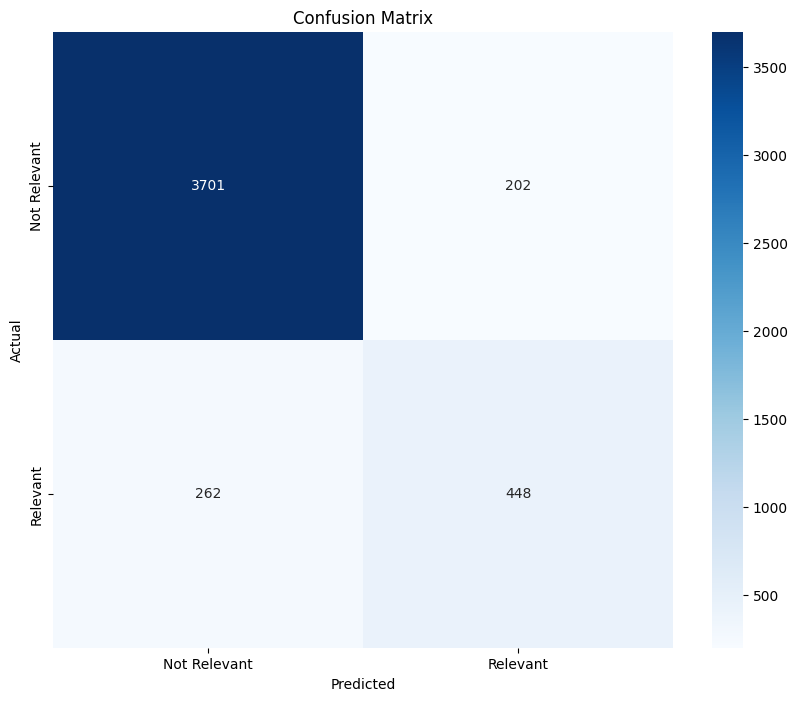

In [20]:
# Generate confusion matrix
conf_matrix = confusion_matrix(all_actuals, all_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()